<a href="https://colab.research.google.com/github/VinciGit00/Python/blob/main/NeuralNetwork/FirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
fashiondata = tf.keras.datasets.mnist


In [30]:
(x_train, y_train), (x_test, y_test) = fashiondata.load_data()

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
x_train, x_test = x_train/255, x_test/255

# Creation of the model

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = 'softmax')

])

In [35]:
model.compile(optimizer = "adam", 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
mfit = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.042

In [38]:
vall_loss, vall_acc = model.evaluate(x_test, y_test)
print(vall_loss, vall_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0669 - accuracy: 0.9816
0.06692905724048615 0.9815999865531921


Text(0, 0.5, 'Cost function')

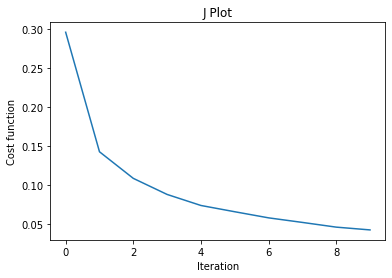

In [39]:
import matplotlib.pyplot as plt
J = mfit.history['loss']
plt.plot(J)
plt.title("J Plot")
plt.xlabel("Iteration")
plt.ylabel("Cost function")
